### Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Importing Dataset

In [2]:
mydata=pd.read_csv("Uber Request Data.csv")
mydata

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


### Renaming Columns (For Clarity)

In [3]:
mydata.columns=['Request_ID','Pickup_Point','Driver_ID','Status','Request_Timestamp','Drop_Timestamp']

In [4]:
mydata.columns

Index(['Request_ID', 'Pickup_Point', 'Driver_ID', 'Status',
       'Request_Timestamp', 'Drop_Timestamp'],
      dtype='object')

### Printing Number of Columns & Rows (For Checking Data Size)

In [5]:
print(mydata.shape)

(6745, 6)


### Printing Datatypes

In [6]:
mydata.dtypes

Request_ID             int64
Pickup_Point          object
Driver_ID            float64
Status                object
Request_Timestamp     object
Drop_Timestamp        object
dtype: object

In [7]:
mydata.isnull().sum()

Request_ID              0
Pickup_Point            0
Driver_ID            2650
Status                  0
Request_Timestamp       0
Drop_Timestamp       3914
dtype: int64

## Analysis: 1

### Pie Chart Visualization Showing Booking Status in Percentages

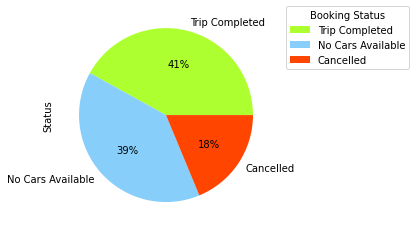

In [8]:
mydata['Status'].value_counts().plot(kind='pie',autopct='%i%%',colors=['greenyellow','lightskyblue','orangered'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title=('Booking Status'))
plt.show()

## Analysis: 2

####  Organising Preliminary Data 

In [9]:
#Converting Timestamp Datatype to Object
mydata["Request_Timestamp"]=pd.to_datetime(mydata["Request_Timestamp"])

#Converting Hour From the Timestamp to Plot Time Slots
mydata["Request_Hour"]=mydata["Request_Timestamp"].dt.hour
mydata["Drop_Timestamp"]=pd.to_datetime(mydata["Drop_Timestamp"])
mydata["Drop_Hour"]=mydata["Drop_Timestamp"].dt.hour

#All the Completed Trips
completed_trips=mydata[mydata['Status']=='Trip Completed']
print('completed_trips:',completed_trips.shape)

#All the Cancelled Trips
cancelled_trips=mydata[mydata['Status']=='Cancelled']
print('cancelled_trips:',cancelled_trips.shape)

#All the Trips Where Cars Were Not Available
no_cars_available=mydata[mydata['Status']=='No Cars Available']
print('cars_unavailable:',no_cars_available.shape)

#Converting the Hours Column to List Format
completed_hour=completed_trips['Request_Hour'].tolist()
cancelled_hour=cancelled_trips['Request_Hour'].tolist()
unavailable_hour=no_cars_available['Request_Hour'].tolist()

completed_trips: (2831, 8)
cancelled_trips: (1264, 8)
cars_unavailable: (2650, 8)


### [A]  Histogram Showing Completed Trips with Time

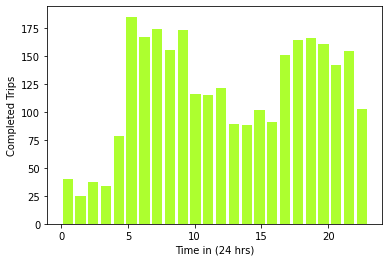

In [10]:
range=(0, 23)
bins=24
def plots(a):
    plt.hist(a,bins,range,color='greenyellow',histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Completed Trips")
plots(completed_hour)
plt.show()

### [B] Histogram Showing Cancelled Trips with Time

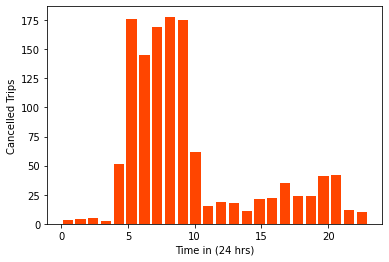

In [11]:
range=(0, 23)
bins=24
def plots(a):
    plt.hist(a,bins,range,color='orangered',histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Cancelled Trips")
plots(cancelled_hour)
plt.show()

### [C] Histogram Showing Unsuccessful Trips due to Un-Availability of Cars with Time

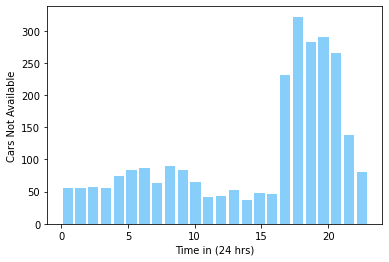

In [12]:
range=(0, 23)
bins=24
def plots(a):
    plt.hist(a,bins,range,color='lightskyblue',histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Cars Not Available")
plots(unavailable_hour)
plt.show()

## Analysis: 3

### Pie Chart Visualization Showing Pickup Points in Percentages

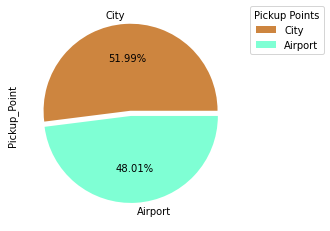

In [13]:
#Pie Chart Visualization of 'Pickup Point'
mydata['Pickup_Point'].value_counts().plot(kind='pie',autopct='%2.2f%%',colors=['peru','aquamarine'],explode=[0.05,0.01])
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0,title=('Pickup Points'))
plt.show()

## Analysis: 4

### Pie Chart Visualization Showing Failed Trips in Percentages

In [14]:
#Failed trips from city to airport
city_to_airport=mydata[(mydata.Status!='Trip Completed')&(mydata.Pickup_Point=='City')]

#Failed trips from airport to city
airport_to_city=mydata[(mydata.Status!='Trip Completed')&(mydata.Pickup_Point=='Airport')]

#Printing failed trips from city to airport
print('Failed trips from city to airport:',city_to_airport.shape)

#Printing failed trips from airport to city
print('Failed trips from airport to city:',airport_to_city.shape)

Failed trips from city to airport: (2003, 8)
Failed trips from airport to city: (1911, 8)


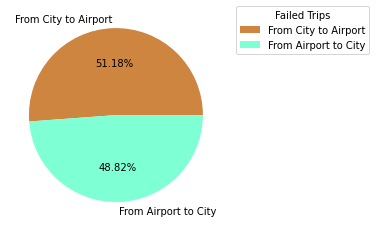

In [15]:
a=["From City to Airport", "From Airport to City"]
b=np.array([2003, 1911])
plt.pie(b, labels=a,autopct='%2.2f%%',colors=['peru','aquamarine'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title=('Failed Trips'))
plt.show()

# Analysis: 5

####  Organising Preliminary Data 

In [16]:
#Cancelled Trips From City to Airport
city_to_airport_cancelled=mydata[(mydata.Status=='Cancelled')&(mydata.Pickup_Point=='City')]
print('cancelled_trips From City to Airport:',city_to_airport_cancelled.shape)

#Trips From City to Airport (When Cars Were Unavailable)
city_to_airport_un_available=mydata[(mydata.Status=='No Cars Available')&(mydata.Pickup_Point=='City')]
print('Unavailable_trips from city to airport:',city_to_airport_un_available.shape)

#Cancelled Trips From Airport to City
airport_to_city_cancelled=mydata[(mydata.Status=='Cancelled')&(mydata.Pickup_Point=='Airport')]
print('cancelled_trips From Airport to City:',airport_to_city_cancelled.shape)

#Trips From Airport to City (When Cars Were Unavailable)
airport_to_city_un_available=mydata[(mydata.Status=='No Cars Available')&(mydata.Pickup_Point=='Airport')]
print('Unavailable_trips from airport to city:',airport_to_city_un_available.shape)

cancelled_trips From City to Airport: (1066, 8)
Unavailable_trips from city to airport: (937, 8)
cancelled_trips From Airport to City: (198, 8)
Unavailable_trips from airport to city: (1713, 8)


### [A] Histogram Showing 'Cancelled Trips From City-to-Airport with Time'

In [17]:
#Converting the Hours Column to List Format
city_to_airport_cancelled_hour = city_to_airport_cancelled['Request_Hour'].tolist()

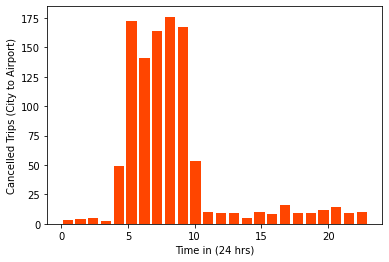

In [18]:
def plots(a):
    plt.hist(a,bins,range,color=['orangered'],histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Cancelled Trips (City to Airport)")
plots(city_to_airport_cancelled_hour)
plt.show()

### [B] Histogram Showing Unsuccessful Trips From 'City-to-Airport due to Un-Availability of Cars with Time'

In [19]:
#Converting the Hours Column to List Format
city_to_airport_un_available_hour = city_to_airport_un_available['Request_Hour'].tolist()

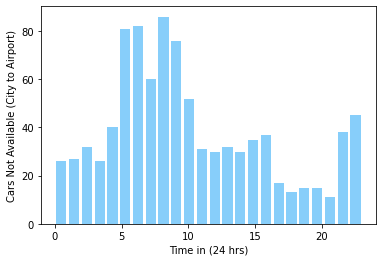

In [20]:
def plots(a):
    plt.hist(a,bins,range,color='lightskyblue',histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Cars Not Available (City to Airport)")
plots(city_to_airport_un_available_hour)
plt.show()

### [C] Histogram Showing 'Cancelled Trips From Airport-to-City with Time'

In [21]:
#Converting the Hours Column to List Format
airport_to_city_cancelled_hour = airport_to_city_cancelled['Request_Hour'].tolist()

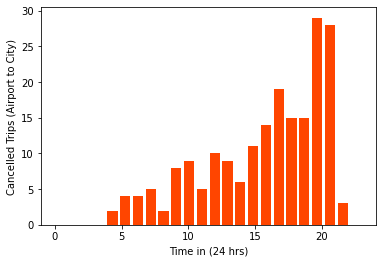

In [22]:
city_to_airport_cancelled_hour=city_to_airport_un_available['Request_Hour'].tolist()
def plots(a):
    plt.hist(a,bins,range,color=['orangered'],histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Cancelled Trips (Airport to City)")
plots(airport_to_city_cancelled_hour)
plt.show()

### [D] Histogram Showing Unsuccessful Trips From 'Airport-to-City due to Un-Availability of Cars with Time'

In [23]:
#Converting the Hours Column to List Format
airport_to_city_un_available_hour = airport_to_city_un_available['Request_Hour'].tolist()

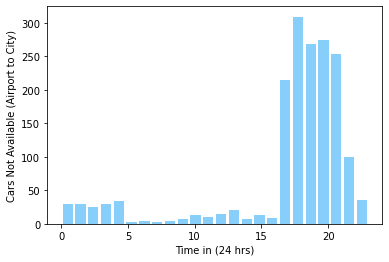

In [24]:
def plots(a):
    plt.hist(a,bins,range,color=['lightskyblue'],histtype='bar',rwidth=0.8)
    plt.xlabel('Time in (24 hrs)')
    plt.ylabel("Cars Not Available (Airport to City)")
plots(airport_to_city_un_available_hour)
plt.show()

## Analysis: 6

### Pie Chart Visualization Showing Supply Demand Gap

In [25]:
#Printing total demand
print('Total_demand:',mydata.shape)

#Printing total completed trips (Demands met)
completed_trips=mydata[mydata['Status']=='Trip Completed']
print('completed_trips:',completed_trips.shape)

Total_demand: (6745, 8)
completed_trips: (2831, 8)


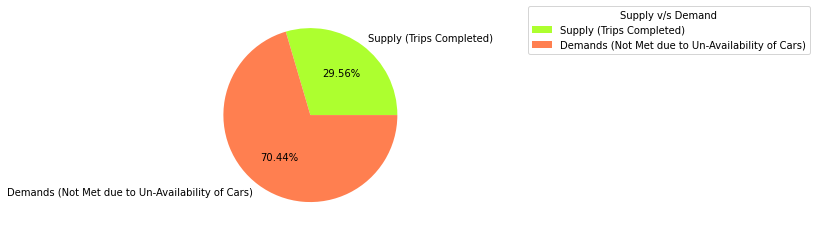

In [26]:
c=["Supply (Trips Completed)", "Demands (Not Met due to Un-Availability of Cars)"]
d=np.array([2831, 6745])
plt.pie(d, labels=c,autopct='%2.2f%%',colors=['greenyellow','coral'])
plt.legend(bbox_to_anchor=(1.5, 1),loc='upper left',borderaxespad=0,title=('Supply v/s Demand'))
plt.show()

### THE END